In [1]:
import time
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from trimkmeans.trimkmeans import TrimKMeans
from sklearn.cluster import KMeans

In [2]:
CENTERS = 3
benchmark_train, true_labels = make_blobs(n_samples=12500, centers=CENTERS, random_state=42)
Benchmark_train = StandardScaler().fit_transform(benchmark_train)

In [3]:
trimkmeans = TrimKMeans(n_clusters=CENTERS)
start_time = time.process_time()
trimkmeans.fit(Benchmark_train[:5000])
trimmed_first_time = round(time.process_time() - start_time, 2)

In [4]:
trimkmeans = TrimKMeans(n_clusters=CENTERS)
start_time = time.process_time()
trimkmeans.fit(Benchmark_train[:7500])
trimmed_second_time = round(time.process_time() - start_time, 2)

In [5]:
trimkmeans = TrimKMeans(n_clusters=CENTERS)
start_time = time.process_time()
trimkmeans.fit(Benchmark_train[:10000])
trimmed_third_time = round(time.process_time() - start_time, 2)

In [6]:
trimkmeans = TrimKMeans(n_clusters=CENTERS)
start_time = time.process_time()
trimkmeans.fit(Benchmark_train)
trimmed_fourth_time = round(time.process_time() - start_time, 2)

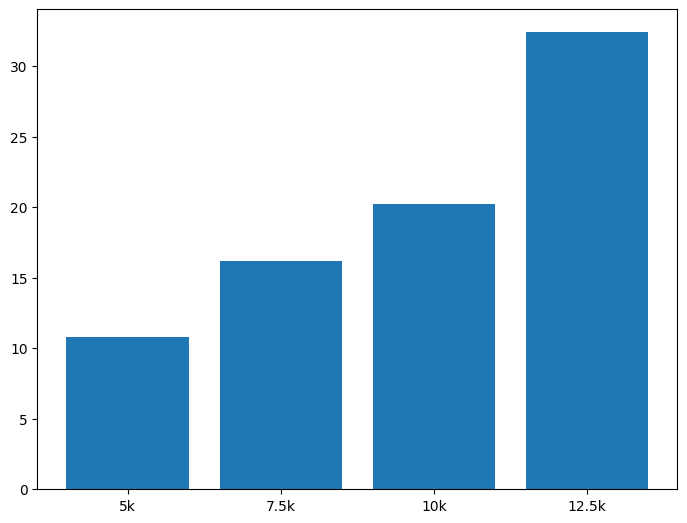

In [7]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
number_of_points = ['5k', '7.5k', '10k', '12.5k']
times = [trimmed_first_time, trimmed_second_time, trimmed_third_time, trimmed_fourth_time]
ax.bar(number_of_points, times)
plt.show()

In [8]:
start_time = time.process_time()
kmeans = KMeans(n_clusters=CENTERS, random_state=42).fit(Benchmark_train[:5000])
kmeans_first_time = round(time.process_time() - start_time, 2)

start_time = time.process_time()
kmeans = KMeans(n_clusters=CENTERS, random_state=42).fit(Benchmark_train[:7500])
kmeans_second_time = round(time.process_time() - start_time, 2)

start_time = time.process_time()
kmeans = KMeans(n_clusters=CENTERS, random_state=42).fit(Benchmark_train[:10000])
kmeans_third_time = round(time.process_time() - start_time, 2)

start_time = time.process_time()
kmeans = KMeans(n_clusters=CENTERS, random_state=42).fit(Benchmark_train)
kmeans_fourth_time = round(time.process_time() - start_time, 2)

In [9]:
%load_ext rpy2.ipython

Unable to determine R home: [WinError 2] Das System kann die angegebene Datei nicht finden
C:\Python310\lib\site-packages\rpy2\robjects\packages.py:367: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(


In [10]:
%%R -i Benchmark_train,CENTERS -o r_first_time,r_second_time,r_third_time,r_fourth_time

library(trimcluster)
start_time <- Sys.time()
tkm1 <- trimkmeans(Benchmark_train[1:5000,], k=CENTERS, trim=0.1, runs=10)
end_time <- Sys.time()
r_first_time <- end_time - start_time

start_time <- Sys.time()
tkm1 <- trimkmeans(Benchmark_train[1:7500,], k=CENTERS, trim=0.1, runs=10)
end_time <- Sys.time()
r_second_time <- end_time - start_time

start_time <- Sys.time()
tkm1 <- trimkmeans(Benchmark_train[1:10000,], k=CENTERS, trim=0.1, runs=10)
end_time <- Sys.time()
r_third_time <- end_time - start_time

start_time <- Sys.time()
tkm1 <- trimkmeans(Benchmark_train, k=CENTERS, trim=0.1, runs=10)
end_time <- Sys.time()
r_fourth_time <- end_time - start_time

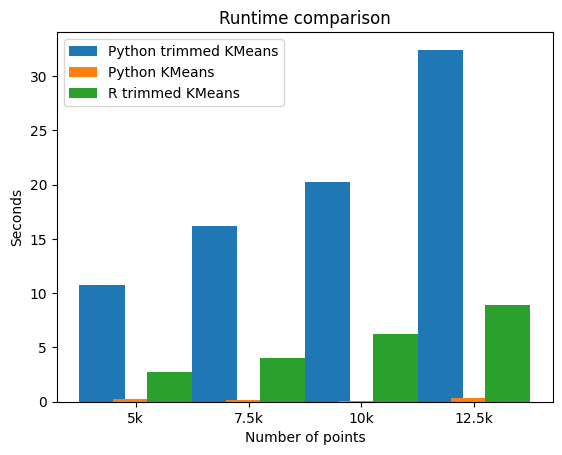

In [11]:
X = ['5k', '7.5k', '10k', '12.5k']
trimmed_times = [trimmed_first_time, trimmed_second_time, trimmed_third_time, trimmed_fourth_time]
kmeans_times = [kmeans_first_time, kmeans_second_time, kmeans_third_time, kmeans_fourth_time]
r_times = [r_first_time[0], r_second_time[0], r_third_time[0], r_fourth_time[0]]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.3, trimmed_times, 0.4, label = 'Python trimmed KMeans')
plt.bar(X_axis, kmeans_times, 0.4, label = 'Python KMeans')
plt.bar(X_axis + 0.3, r_times, 0.4, label = 'R trimmed KMeans')
  
plt.xticks(X_axis, X)
plt.xlabel("Number of points")
plt.ylabel("Seconds")
plt.title("Runtime comparison")
plt.legend()
plt.show()